In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

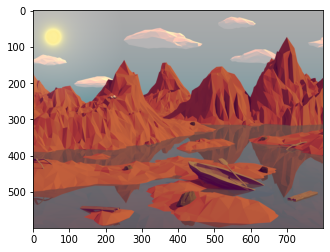

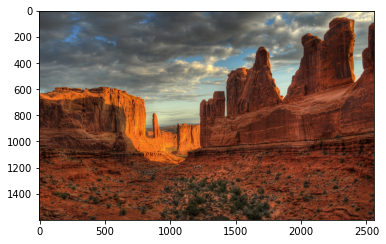

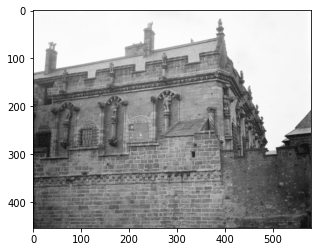

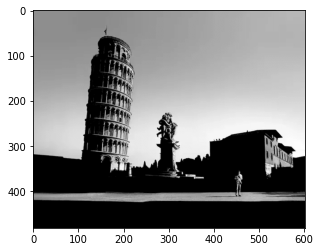

In [40]:
image_names = ['low_detail.png', 'high_detail.png', 'low_contrast.png', 'high_cont.png']

images = []
# Read and Output Images
for image in image_names:
   img = mpimg.imread('cv_lab1_images/' + image)
   images.append(img)
   plt.imshow(img)
   plt.show()

In [67]:
def sobel_filter(img):
  # apply gray scale
  gray_img = np.round(0.299 * img[:, :, 0] +
                      0.587 * img[:, :, 1] +
                      0.114 * img[:, :, 2]).astype(np.uint8)

  h, w = gray_img.shape
  
  # define Sobel Operator
  kernel_Sobel_x = np.array([ #horizontal
  [-1, 0, 1], 
  [-2, 0, 2], 
  [-1, 0, 1]]) 
  kernel_Sobel_y = np.array([ #vertical
  [1, 2, 1], 
  [0, 0, 0],
  [-1, -2, -1]]) 

  newhorizontalImage = np.zeros((h, w))
  newverticalImage = np.zeros((h, w))
  newgradientImage = np.zeros((h, w))

  for i in range(1, h - 1):
      for j in range(1, w - 1):
          horizontalGrad = (kernel_Sobel_x[0, 0] * gray_img[i - 1, j - 1]) + \
                          (kernel_Sobel_x[0, 1] * gray_img[i - 1, j]) + \
                          (kernel_Sobel_x[0, 2] * gray_img[i - 1, j + 1]) + \
                          (kernel_Sobel_x[1, 0] * gray_img[i, j - 1]) + \
                          (kernel_Sobel_x[1, 1] * gray_img[i, j]) + \
                          (kernel_Sobel_x[1, 2] * gray_img[i, j + 1]) + \
                          (kernel_Sobel_x[2, 0] * gray_img[i + 1, j - 1]) + \
                          (kernel_Sobel_x[2, 1] * gray_img[i + 1, j]) + \
                          (kernel_Sobel_x[2, 2] * gray_img[i + 1, j + 1])

          newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

          verticalGrad = (kernel_Sobel_y[0, 0] * gray_img[i - 1, j - 1]) + \
                        (kernel_Sobel_y[0, 1] * gray_img[i - 1, j]) + \
                        (kernel_Sobel_y[0, 2] * gray_img[i - 1, j + 1]) + \
                        (kernel_Sobel_y[1, 0] * gray_img[i, j - 1]) + \
                        (kernel_Sobel_y[1, 1] * gray_img[i, j]) + \
                        (kernel_Sobel_y[1, 2] * gray_img[i, j + 1]) + \
                        (kernel_Sobel_y[2, 0] * gray_img[i + 1, j - 1]) + \
                        (kernel_Sobel_y[2, 1] * gray_img[i + 1, j]) + \
                        (kernel_Sobel_y[2, 2] * gray_img[i + 1, j + 1])

          newverticalImage[i - 1, j - 1] = abs(verticalGrad)

          mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
          newgradientImage[i - 1, j - 1] = mag

  return newgradientImage

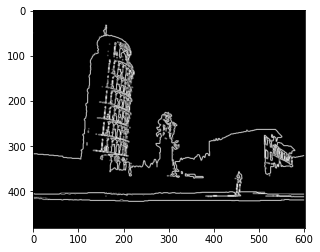

In [66]:
im = np.array(images[3])
sobel_filter(im)

In [75]:
def prewitt_filter(img):
  # apply gray scale
  gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

  h, w = gray_img.shape

  # define Prewitt Operator 
  kernel_Prewitt_x = np.array([ 
  [-1, 0, 1], 
  [-1, 0, 1], 
  [-1, 0, 1]]) 
  kernel_Prewitt_y = np.array([ 
  [1, 1, 1], 
  [0, 0, 0], 
  [-1, -1, -1]]) 

  newgradientImage = np.zeros((h, w))

  for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (kernel_Prewitt_x[0, 0] * gray_img[i - 1, j - 1]) + \
                          (kernel_Prewitt_x[0, 1] * gray_img[i - 1, j]) + \
                          (kernel_Prewitt_x[0, 2] * gray_img[i - 1, j + 1]) + \
                          (kernel_Prewitt_x[1, 0] * gray_img[i, j - 1]) + \
                          (kernel_Prewitt_x[1, 1] * gray_img[i, j]) + \
                          (kernel_Prewitt_x[1, 2] * gray_img[i, j + 1]) + \
                          (kernel_Prewitt_x[2, 0] * gray_img[i + 1, j - 1]) + \
                          (kernel_Prewitt_x[2, 1] * gray_img[i + 1, j]) + \
                          (kernel_Prewitt_x[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (kernel_Prewitt_y[0, 0] * gray_img[i - 1, j - 1]) + \
                        (kernel_Prewitt_y[0, 1] * gray_img[i - 1, j]) + \
                        (kernel_Prewitt_y[0, 2] * gray_img[i - 1, j + 1]) + \
                        (kernel_Prewitt_y[1, 0] * gray_img[i, j - 1]) + \
                        (kernel_Prewitt_y[1, 1] * gray_img[i, j]) + \
                        (kernel_Prewitt_y[1, 2] * gray_img[i, j + 1]) + \
                        (kernel_Prewitt_y[2, 0] * gray_img[i + 1, j - 1]) + \
                        (kernel_Prewitt_y[2, 1] * gray_img[i + 1, j]) + \
                        (kernel_Prewitt_y[2, 2] * gray_img[i + 1, j + 1])

        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

  return newgradientImage

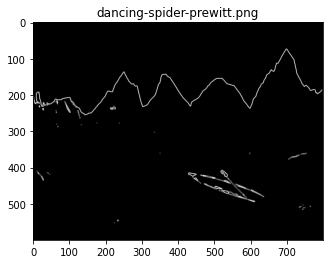

In [44]:
im = np.array(images[0])
prewitt_filter(im)

In [72]:
def plots(img, img_after_sobel, img_after_prewwit, feature):
  plt.subplots(1, 3 , figsize=(20,10))
  plt.subplot(1, 3, 1)
  plt.imshow(img, cmap='gray')
  plt.title('Initial image', fontsize = 20, pad = 20)

  plt.subplot(1, 3, 2)
  plt.imsave(f'{str(feature)}_after_sobel.png', img_after_sobel, cmap='gray', format='png')
  plt.imshow(img_after_sobel, cmap='gray')
  plt.title('Image after Sobel filter', fontsize = 20, pad = 20)

  plt.subplot(1, 3, 3)
  plt.imsave(f'{str(feature)}_after_prewwit.png', img_after_sobel, cmap='gray', format='png')
  plt.imshow(img_after_prewwit, cmap='gray')
  plt.title('Image after Prewitt filter', fontsize = 20, pad = 20)

  plt.tight_layout()
  plt.savefig(f'{str(feature)}_result.png')
  plt.show()

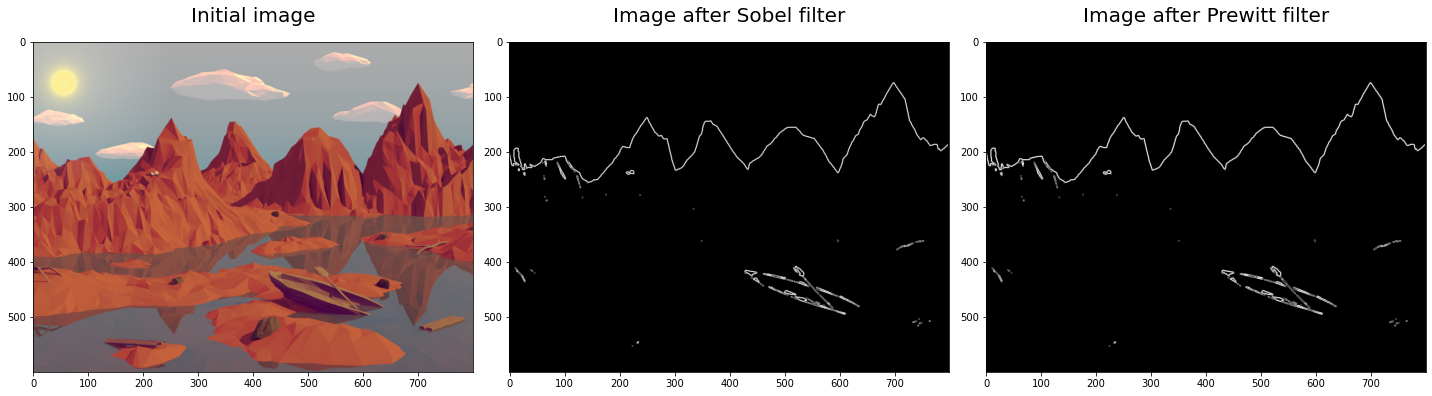

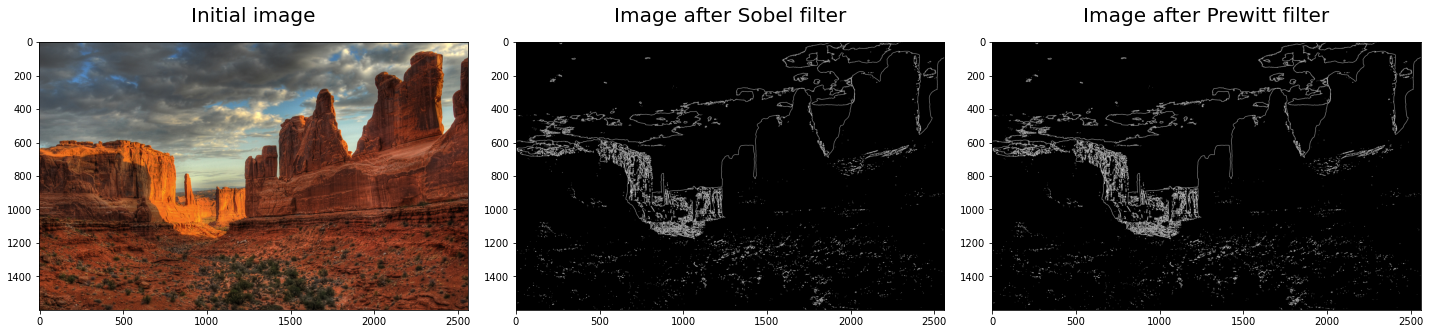

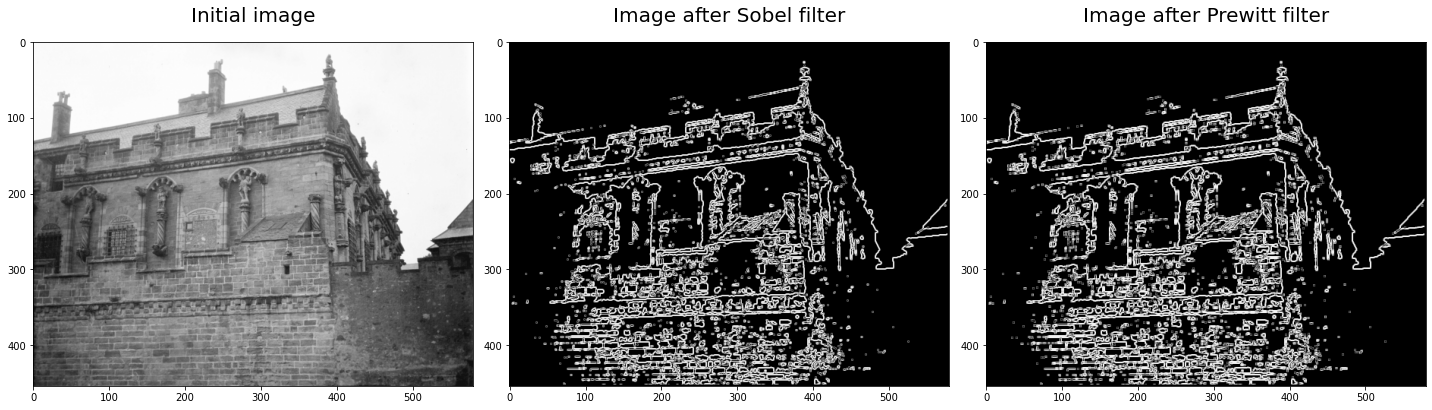

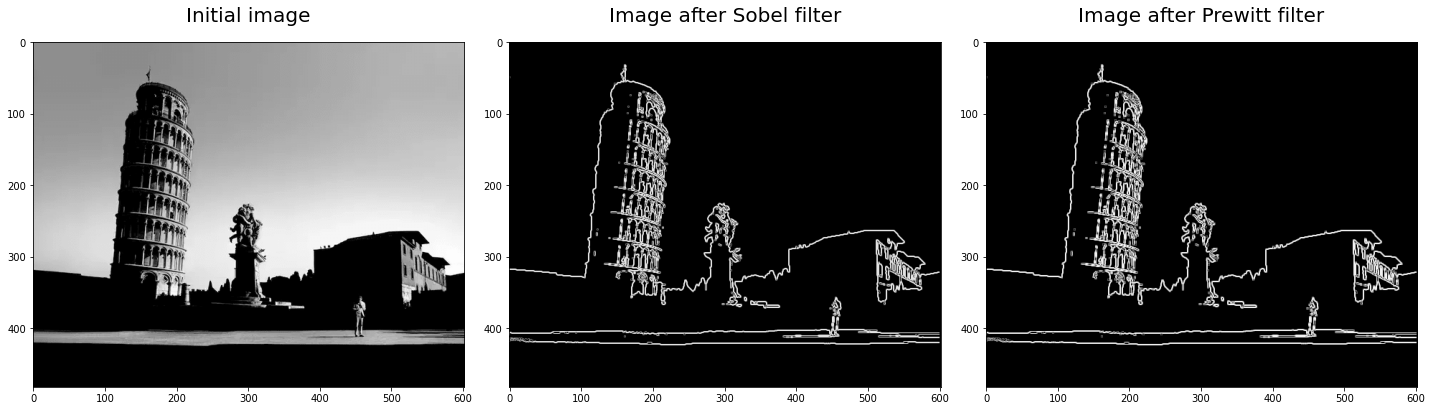

In [73]:
features = ['low_detail', 'high_detail', 'low_contrast', 'high_contrast']
for i in range(len(images)):
  img = np.array(images[i])
  sobel = sobel_filter(images[i])
  prewwit = prewitt_filter(images[i])
  plots(img, sobel, prewwit, features[i])